# Loading Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
train=pd.read_csv("bigdatamart_Train.csv")
test=pd.read_csv("bigdatamart_Test.csv")

In [102]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
datamart=pd.concat([train, test],ignore_index=True)
datamart.shape

(14204, 12)

In [104]:
train.shape

(8523, 12)

In [105]:
test.shape

(5681, 11)

In [106]:
datamart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
datamart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [108]:
datamart.rename(columns={"Item_Identifier": "Item_ID", "Item_Weight": "Weight", "Item_Fat_Content": "I_Fat","Item_Visibility":"I_Visibility","Item_Type":"I_Type","Item_MRP":"I_MRP","Outlet_Identifier":"O_ID","Outlet_Establishment_Year":"O_Esh_Year","Outlet_Size":"O_Size","Outlet_Location_Type":"O_Lc_Type","Outlet_Type":"O_Type","Item_Outlet_Sales":"I_O_Sales"}, errors="raise",inplace=True)

As the column names are bigger that's why I have changed the column names.

In [109]:
datamart.columns

Index(['Item_ID', 'Weight', 'I_Fat', 'I_Visibility', 'I_Type', 'I_MRP', 'O_ID',
       'O_Esh_Year', 'O_Size', 'O_Lc_Type', 'O_Type', 'I_O_Sales'],
      dtype='object')

These are the new column names

In [110]:
datamart.head(15)

,Item_ID,Weight,I_Fat,I_Visibility,I_Type,I_MRP,O_ID,O_Esh_Year,O_Size,O_Lc_Type,O_Type,I_O_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


First 15 rows of the dataset

In [111]:
for col in datamart:
    print(datamart[col].value_counts())

FDD45    10
FDU26    10
FDJ20    10
FDW40    10
FDK09    10
         ..
NCL42     7
FDO33     7
FDS22     7
FDM50     7
FDI46     7
Name: Item_ID, Length: 1559, dtype: int64
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Weight, Length: 415, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: I_Fat, dtype: int64
0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: I_Visibility, Length: 13006, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Br

There are no columns where all the values are unique.

In [112]:
datamart.nunique()

Item_ID          1559
Weight            415
I_Fat               5
I_Visibility    13006
I_Type             16
I_MRP            8052
O_ID               10
O_Esh_Year          9
O_Size              3
O_Lc_Type           3
O_Type              4
I_O_Sales        3493
dtype: int64

Check the total number of unique values in each columns.Item Visibility column has a lot of unique items.

In [113]:
datamart.isnull().sum()

Item_ID            0
Weight          2439
I_Fat              0
I_Visibility       0
I_Type             0
I_MRP              0
O_ID               0
O_Esh_Year         0
O_Size          4016
O_Lc_Type          0
O_Type             0
I_O_Sales       5681
dtype: int64

Null values are present in Weight,O_Size and I_O_Sales these three columns

# Data Cleaning

Fill the null values with average weight acording to the ITEM_ID

In [114]:
#I_Weight=datamart.pivot_table(values="Weight",index="Item_ID")

Get a boolean variable specifying missing Weight values

In [115]:
#miss_bool=datamart["Weight"].isnull()

Impute data and check missing values before and after imputation to confirm

In [116]:
#print("Original missing values: %d"%sum(miss_bool))
#datamart.loc[miss_bool,'Weight']=datamart.loc[miss_bool,'Item_ID'].apply(lambda x:I_Weight.loc[x])
#print("Final missing values : %d"%sum(datamart["Weight"].isnull())

In [117]:
datamart["Weight"] = datamart.groupby("Item_ID").transform(lambda x: x.fillna(x.mean()))

In [118]:
datamart.isnull().sum()

Item_ID            0
Weight             0
I_Fat              0
I_Visibility       0
I_Type             0
I_MRP              0
O_ID               0
O_Esh_Year         0
O_Size          4016
O_Lc_Type          0
O_Type             0
I_O_Sales       5681
dtype: int64

Fill the null values according to "Item_ID"

In [119]:
datamart["O_Size"] = datamart.groupby("O_Type").transform(lambda x: x.fillna(x.mode()))
datamart.isnull().sum()

Item_ID            0
Weight             0
I_Fat              0
I_Visibility       0
I_Type             0
I_MRP              0
O_ID               0
O_Esh_Year         0
O_Size             0
O_Lc_Type          0
O_Type             0
I_O_Sales       5681
dtype: int64

Fill the null values according "to O_Type"

# Feature Engineering

In [120]:
datamart.describe()

,Weight,I_Visibility,I_MRP,O_Esh_Year,I_O_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.065953,141.004977,1997.830681,2181.288914
std,4.651716,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here we can see that in the "I_Visibility" column the minimum value is 0. But It can not be possible. Minimum value can not be 0. Let consider 0 as missing information.

In [121]:
datamart["I_Visibility"] = datamart.groupby("Item_ID").transform(lambda x: x.fillna(x.mean()))
datamart.describe()

,Weight,I_Visibility,I_MRP,O_Esh_Year,I_O_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,12.793380,141.004977,1997.830681,2181.288914
std,4.651716,4.651716,62.086938,8.371664,1706.499616
min,4.555000,4.555000,31.290000,1985.000000,33.290000
25%,8.710000,8.710000,94.012000,1987.000000,834.247400
50%,12.600000,12.600000,142.247000,1999.000000,1794.331000
75%,16.750000,16.750000,185.855600,2004.000000,3101.296400
max,21.350000,21.350000,266.888400,2009.000000,13086.964800


Here I have filled up the 0 values with the average values of Item_ID. Now the minimum value of I_Visibility column has been changed.

Another observations: 

There are huge difference of 75% and max value in the I_O_Sales columns. 

In [122]:
datamart["Item_Type_Combined"]=datamart["Item_ID"].apply(lambda x:x[0:2])
datamart["Item_Type_Combined"]=datamart["Item_Type_Combined"].map({'FD':'Food',
                                             'NC':'Non-Consumable',
                                             'DR':'Drinks'})
datamart['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [123]:
datamart.head()

,Item_ID,Weight,I_Fat,I_Visibility,I_Type,I_MRP,O_ID,O_Esh_Year,O_Size,O_Lc_Type,O_Type,I_O_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,9.30,Dairy,249.8092,OUT049,1999,FDA15,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,5.92,Soft Drinks,48.2692,OUT018,2009,DRC01,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,17.50,Meat,141.6180,OUT049,1999,FDN15,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,19.20,Fruits and Vegetables,182.0950,OUT010,1998,FDX07,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,8.93,Household,53.8614,OUT013,1987,NCD19,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [124]:
datamart['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [128]:
datamart["Item_Fat"]=datamart["I_Fat"].replace({'LF':'Low Fat',
                                             'Reg':'Regular',
                                             'low fat':'Low Fat'})
datamart['Item_Fat'].value_counts()

Low Fat    9185
Regular    4824
reg         195
Name: Item_Fat, dtype: int64

Modify catagories of I_Fat

# Convert catagorical to Numeric

# LabelEncoding(for nominal variables)

In [129]:
from sklearn.preprocessing import LabelEncoder
columns=['Item_ID','I_Type','O_ID','O_Type','Item_Type_Combined']
for column in datamart.columns:
    if datamart[column].dtype==np.number:
        continue
    datamart[column]=LabelEncoder().fit_transform(datamart[column])  

<ipython-input-129-1bc24a00ad6d>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if datamart[column].dtype==np.number:


In [130]:
datamart.nunique()

Item_ID               1559
Weight                 628
I_Fat                    5
I_Visibility           628
I_Type                  16
I_MRP                 8052
O_ID                    10
O_Esh_Year               9
O_Size                1559
O_Lc_Type                3
O_Type                   4
I_O_Sales             3493
Item_Type_Combined       3
Item_Fat                 3
dtype: int64

In [131]:
datamart.shape

(14204, 14)

# One-Hot-Coding(For catagorical variable)

In [132]:
datamart.dtypes

Item_ID                 int32
Weight                float64
I_Fat                   int32
I_Visibility          float64
I_Type                  int32
I_MRP                 float64
O_ID                    int32
O_Esh_Year              int64
O_Size                  int32
O_Lc_Type               int32
O_Type                  int32
I_O_Sales             float64
Item_Type_Combined      int32
Item_Fat                int32
dtype: object

In [133]:
datamart.isnull().sum()

Item_ID                  0
Weight                   0
I_Fat                    0
I_Visibility             0
I_Type                   0
I_MRP                    0
O_ID                     0
O_Esh_Year               0
O_Size                   0
O_Lc_Type                0
O_Type                   0
I_O_Sales             5681
Item_Type_Combined       0
Item_Fat                 0
dtype: int64

In [134]:
datamart.corr()

,Item_ID,Weight,I_Fat,I_Visibility,I_Type,I_MRP,O_ID,O_Esh_Year,O_Size,O_Lc_Type,O_Type,I_O_Sales,Item_Type_Combined,Item_Fat
Item_ID,1.000000,0.050768,-0.096220,0.050768,-0.012048,0.010743,-0.001089,-0.003173,1.000000,-0.002473,-0.004532,0.002869,0.787827,-0.109036
Weight,0.050768,1.000000,-0.030824,1.000000,0.031884,0.035751,0.003002,0.000301,0.050768,-0.001719,0.001913,0.013261,0.068781,-0.032109
I_Fat,-0.096220,-0.030824,1.000000,-0.030824,-0.121140,-0.006195,-0.001733,-0.002541,-0.096220,-0.002518,-0.002380,0.009800,-0.144513,0.873798
I_Visibility,0.050768,1.000000,-0.030824,1.000000,0.031884,0.035751,0.003002,0.000301,0.050768,-0.001719,0.001913,0.013261,0.068781,-0.032109
I_Type,-0.012048,0.031884,-0.121140,0.031884,1.000000,0.043948,0.001126,0.003295,-0.012048,0.002083,0.004305,0.017048,0.011683,-0.142278
I_MRP,0.010743,0.035751,-0.006195,0.035751,0.043948,1.000000,-0.000555,0.000302,0.010743,0.000838,0.000136,0.567574,0.030219,-0.005848
O_ID,-0.001089,0.003002,-0.001733,0.003002,0.001126,-0.000555,1.000000,-0.030948,-0.001089,-0.716151,0.099899,0.162325,0.001090,-0.001313
O_Esh_Year,-0.003173,0.000301,-0.002541,0.000301,0.003295,0.000302,-0.030948,1.000000,-0.003173,0.041889,-0.040255,-0.025525,-0.002365,0.001747
O_Size,1.000000,0.050768,-0.096220,0.050768,-0.012048,0.010743,-0.001089,-0.003173,1.000000,-0.002473,-0.004532,0.002869,0.787827,-0.109036
O_Lc_Type,-0.002473,-0.001719,-0.002518,-0.001719,0.002083,0.000838,-0.716151,0.041889,-0.002473,1.000000,0.467251,0.089367,-0.002572,0.000267


In [136]:
datamart["I_O_Sales"] = datamart.groupby("Item_ID").transform(lambda x: x.fillna(x.mean()))
datamart.isnull().sum()

Item_ID               0
Weight                0
I_Fat                 0
I_Visibility          0
I_Type                0
I_MRP                 0
O_ID                  0
O_Esh_Year            0
O_Size                0
O_Lc_Type             0
O_Type                0
I_O_Sales             0
Item_Type_Combined    0
Item_Fat              0
dtype: int64

In [137]:
datamart.corr()

,Item_ID,Weight,I_Fat,I_Visibility,I_Type,I_MRP,O_ID,O_Esh_Year,O_Size,O_Lc_Type,O_Type,I_O_Sales,Item_Type_Combined,Item_Fat
Item_ID,1.000000,0.050768,-0.096220,0.050768,-0.012048,0.010743,-0.001089,-0.003173,1.000000,-0.002473,-0.004532,0.050768,0.787827,-0.109036
Weight,0.050768,1.000000,-0.030824,1.000000,0.031884,0.035751,0.003002,0.000301,0.050768,-0.001719,0.001913,1.000000,0.068781,-0.032109
I_Fat,-0.096220,-0.030824,1.000000,-0.030824,-0.121140,-0.006195,-0.001733,-0.002541,-0.096220,-0.002518,-0.002380,-0.030824,-0.144513,0.873798
I_Visibility,0.050768,1.000000,-0.030824,1.000000,0.031884,0.035751,0.003002,0.000301,0.050768,-0.001719,0.001913,1.000000,0.068781,-0.032109
I_Type,-0.012048,0.031884,-0.121140,0.031884,1.000000,0.043948,0.001126,0.003295,-0.012048,0.002083,0.004305,0.031884,0.011683,-0.142278
I_MRP,0.010743,0.035751,-0.006195,0.035751,0.043948,1.000000,-0.000555,0.000302,0.010743,0.000838,0.000136,0.035751,0.030219,-0.005848
O_ID,-0.001089,0.003002,-0.001733,0.003002,0.001126,-0.000555,1.000000,-0.030948,-0.001089,-0.716151,0.099899,0.003002,0.001090,-0.001313
O_Esh_Year,-0.003173,0.000301,-0.002541,0.000301,0.003295,0.000302,-0.030948,1.000000,-0.003173,0.041889,-0.040255,0.000301,-0.002365,0.001747
O_Size,1.000000,0.050768,-0.096220,0.050768,-0.012048,0.010743,-0.001089,-0.003173,1.000000,-0.002473,-0.004532,0.050768,0.787827,-0.109036
O_Lc_Type,-0.002473,-0.001719,-0.002518,-0.001719,0.002083,0.000838,-0.716151,0.041889,-0.002473,1.000000,0.467251,-0.001719,-0.002572,0.000267


In [140]:
datamart.shape

(14204, 12)

In [138]:
datamart.drop(['Item_ID','O_Esh_Year'],axis=1,inplace=True)

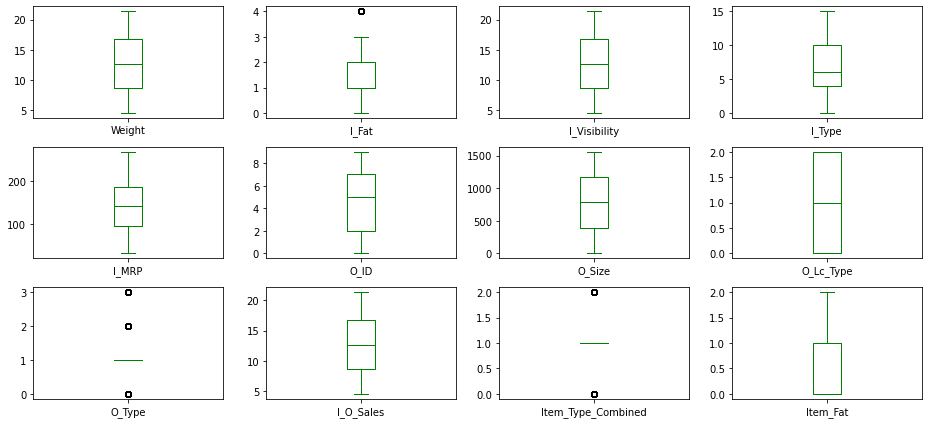

In [141]:
datamart.plot(kind='box',subplots=True,layout=(3,4),color='green',figsize=(13,6))
plt.tight_layout()

O_Type has many outliers and the correlation is not good as well. Let me delete this column.

In [142]:
datamart.drop(['O_Type'],axis=1,inplace=True)

# Removing Outliers

In [144]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(datamart))
threshold=3
new_datamart=datamart[(z<3).all(axis=1)]

In [145]:
print(new_datamart.shape)
print(datamart.shape)

(14009, 11)
(14204, 11)


percentage loss

In [146]:
percentage_loss=(195/14204)*100
percentage_loss

1.3728527175443537

Percentage loss is not too high. So, it's acepted.

# identify best random_state using Logistic Regression

In [147]:
#Prepare the dataset for training the model
x=new_diabetes.drop('I_O_Sales',axis=1)
y=new_diabetes['I_O_Sales']

# Skewness

In [148]:
datamart.columns

Index(['Weight', 'I_Fat', 'I_Visibility', 'I_Type', 'I_MRP', 'O_ID', 'O_Size',
       'O_Lc_Type', 'I_O_Sales', 'Item_Type_Combined', 'Item_Fat'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

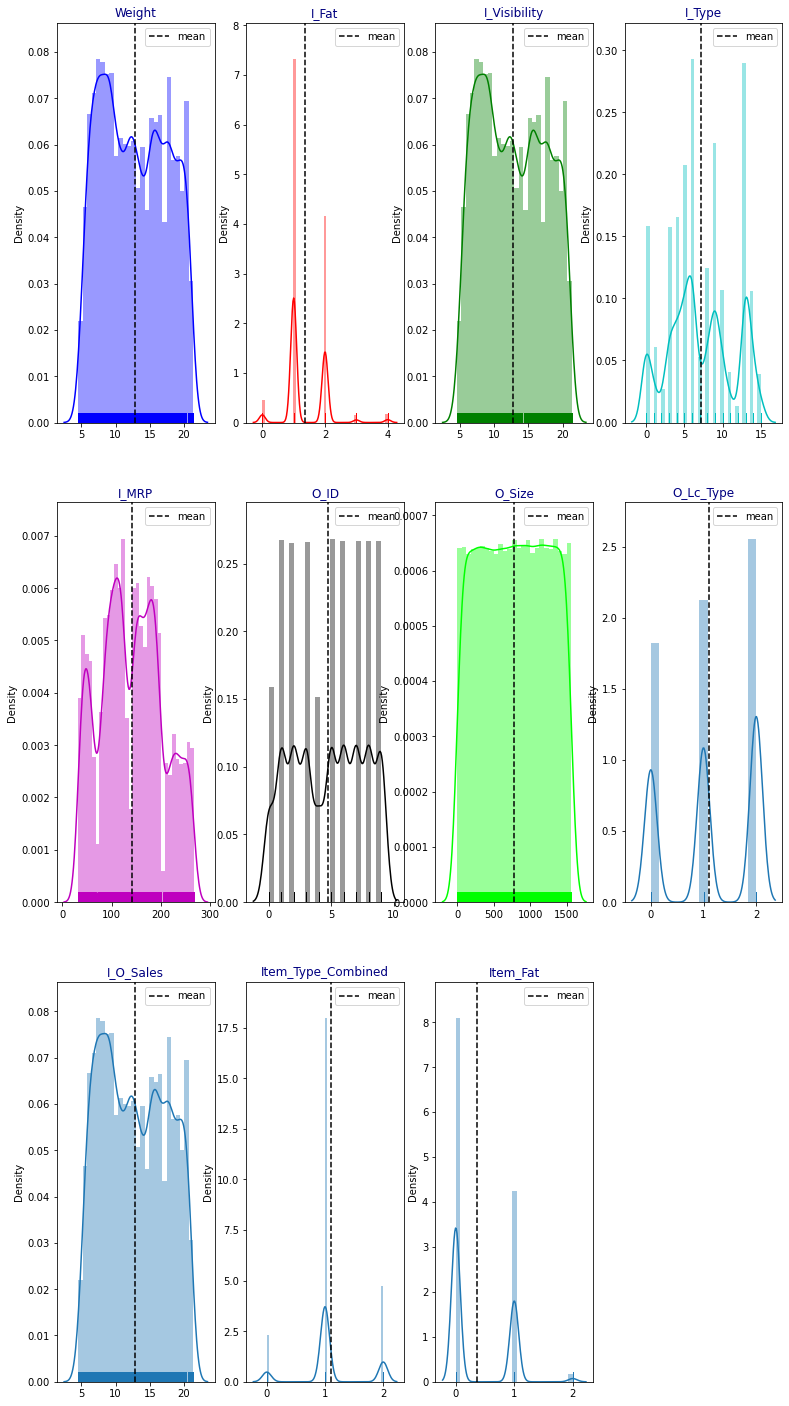

In [150]:
import itertools
cols=['Weight', 'I_Fat', 'I_Visibility', 'I_Type', 'I_MRP', 'O_ID', 'O_Size',
       'O_Lc_Type', 'I_O_Sales', 'Item_Type_Combined', 'Item_Fat']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,4,j+1)
    ax=sns.distplot(datamart[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(datamart[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Skewness is present in almost all the columns

In [151]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [152]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training r2_score is :-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",r2_score(y_test,pred_test)*100)

At random state 0 The model performs very well
At random state :- 0
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 1 The model performs very well
At random state :- 1
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 2 The model performs very well
At random state :- 2
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 3 The model performs very well
At random state :- 3
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 4 The model performs very well
At random state :- 4
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 5 The model performs very well
At random state :- 5
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 6 The model performs very well
At random state :- 6
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 7 The model performs very well
At random state :- 7
Training r2_score is :- 100.0
Testing r2_sc

At random state 64 The model performs very well
At random state :- 64
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 65 The model performs very well
At random state :- 65
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 66 The model performs very well
At random state :- 66
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 67 The model performs very well
At random state :- 67
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 68 The model performs very well
At random state :- 68
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 69 The model performs very well
At random state :- 69
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 70 The model performs very well
At random state :- 70
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 71 The model performs very well
At random state :- 71
Training r2_score is :- 100

At random state 147 The model performs very well
At random state :- 147
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 148 The model performs very well
At random state :- 148
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 149 The model performs very well
At random state :- 149
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 150 The model performs very well
At random state :- 150
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 151 The model performs very well
At random state :- 151
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 152 The model performs very well
At random state :- 152
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 153 The model performs very well
At random state :- 153
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 154 The model performs very well
At random state :- 154
Training r2

At random state 216 The model performs very well
At random state :- 216
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 217 The model performs very well
At random state :- 217
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 218 The model performs very well
At random state :- 218
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 219 The model performs very well
At random state :- 219
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 220 The model performs very well
At random state :- 220
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 221 The model performs very well
At random state :- 221
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 222 The model performs very well
At random state :- 222
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 223 The model performs very well
At random state :- 223
Training r2

Testing r2_score is :- 100.0
At random state 285 The model performs very well
At random state :- 285
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 286 The model performs very well
At random state :- 286
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 287 The model performs very well
At random state :- 287
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 288 The model performs very well
At random state :- 288
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 289 The model performs very well
At random state :- 289
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 290 The model performs very well
At random state :- 290
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 291 The model performs very well
At random state :- 291
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 292 The model performs very well
At ra

Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 352 The model performs very well
At random state :- 352
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 353 The model performs very well
At random state :- 353
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 354 The model performs very well
At random state :- 354
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 355 The model performs very well
At random state :- 355
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 356 The model performs very well
At random state :- 356
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 357 The model performs very well
At random state :- 357
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 358 The model performs very well
At random state :- 358
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 359 The 

Testing r2_score is :- 100.0
At random state 420 The model performs very well
At random state :- 420
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 421 The model performs very well
At random state :- 421
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 422 The model performs very well
At random state :- 422
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 423 The model performs very well
At random state :- 423
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 424 The model performs very well
At random state :- 424
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 425 The model performs very well
At random state :- 425
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 426 The model performs very well
At random state :- 426
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 427 The model performs very well
At ra

At random state 488 The model performs very well
At random state :- 488
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 489 The model performs very well
At random state :- 489
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 490 The model performs very well
At random state :- 490
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 491 The model performs very well
At random state :- 491
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 492 The model performs very well
At random state :- 492
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 493 The model performs very well
At random state :- 493
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 494 The model performs very well
At random state :- 494
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 495 The model performs very well
At random state :- 495
Training r2

Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 557 The model performs very well
At random state :- 557
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 558 The model performs very well
At random state :- 558
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 559 The model performs very well
At random state :- 559
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 560 The model performs very well
At random state :- 560
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 561 The model performs very well
At random state :- 561
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 562 The model performs very well
At random state :- 562
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 563 The model performs very well
At random state :- 563
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 564 The 

At random state 624 The model performs very well
At random state :- 624
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 625 The model performs very well
At random state :- 625
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 626 The model performs very well
At random state :- 626
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 627 The model performs very well
At random state :- 627
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 628 The model performs very well
At random state :- 628
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 629 The model performs very well
At random state :- 629
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 630 The model performs very well
At random state :- 630
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 631 The model performs very well
At random state :- 631
Training r2

At random state 693 The model performs very well
At random state :- 693
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 694 The model performs very well
At random state :- 694
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 695 The model performs very well
At random state :- 695
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 696 The model performs very well
At random state :- 696
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 697 The model performs very well
At random state :- 697
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 698 The model performs very well
At random state :- 698
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 699 The model performs very well
At random state :- 699
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 700 The model performs very well
At random state :- 700
Training r2

At random state 756 The model performs very well
At random state :- 756
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 757 The model performs very well
At random state :- 757
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 758 The model performs very well
At random state :- 758
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 759 The model performs very well
At random state :- 759
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 760 The model performs very well
At random state :- 760
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 761 The model performs very well
At random state :- 761
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 762 The model performs very well
At random state :- 762
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 763 The model performs very well
At random state :- 763
Training r2

At random state 824 The model performs very well
At random state :- 824
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 825 The model performs very well
At random state :- 825
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 826 The model performs very well
At random state :- 826
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 827 The model performs very well
At random state :- 827
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 828 The model performs very well
At random state :- 828
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 829 The model performs very well
At random state :- 829
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 830 The model performs very well
At random state :- 830
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 831 The model performs very well
At random state :- 831
Training r2

Testing r2_score is :- 100.0
At random state 894 The model performs very well
At random state :- 894
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 895 The model performs very well
At random state :- 895
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 896 The model performs very well
At random state :- 896
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 897 The model performs very well
At random state :- 897
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 898 The model performs very well
At random state :- 898
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 899 The model performs very well
At random state :- 899
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 900 The model performs very well
At random state :- 900
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 901 The model performs very well
At ra

At random state 962 The model performs very well
At random state :- 962
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 963 The model performs very well
At random state :- 963
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 964 The model performs very well
At random state :- 964
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 965 The model performs very well
At random state :- 965
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 966 The model performs very well
At random state :- 966
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 967 The model performs very well
At random state :- 967
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 968 The model performs very well
At random state :- 968
Training r2_score is :- 100.0
Testing r2_score is :- 100.0
At random state 969 The model performs very well
At random state :- 969
Training r2

It seems that there is overfitting

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=42)

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [155]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [156]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is :- ", lsc*100)
    print("R2 score is :-", lss*100)
    print("\n")

At cv:- 2
Cross Validation Score is :-  99.99999995362762
R2 score is :- 99.99999995366933


At cv:- 3
Cross Validation Score is :-  99.99999995367718
R2 score is :- 99.99999995366933


At cv:- 4
Cross Validation Score is :-  99.99999995371421
R2 score is :- 99.99999995366933


At cv:- 5
Cross Validation Score is :-  99.99999995370068
R2 score is :- 99.99999995366933


At cv:- 6
Cross Validation Score is :-  99.99999995369232
R2 score is :- 99.99999995366933


At cv:- 7
Cross Validation Score is :-  99.99999995370962
R2 score is :- 99.99999995366933


At cv:- 8
Cross Validation Score is :-  99.9999999537157
R2 score is :- 99.99999995366933


At cv:- 9
Cross Validation Score is :-  99.99999995370736
R2 score is :- 99.99999995366933




In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [158]:
print("Error")
print("Mean Absolute Eror : ",mean_absolute_error(y_test,pred_ls))
print("Mean Squared Eror : ",mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,pred_ls)))

Error
Mean Absolute Eror :  8.74826683595237e-05
Mean Squared Eror :  1.006493274320385e-08
Root Mean Squared Eror :  0.00010032413838754784


# Hyper Parameter tuning

Decision Tree regressor

In [159]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [160]:
dt=DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)

dts=r2_score(y_test,pred_dt)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score : ',dtc*100)

R2 Score: 99.99999963036582
Cross Val Score :  99.9999997775699


In [161]:
print("Error")
print("Mean Absolute Eror : ",mean_absolute_error(y_test,pred_dt))
print("Mean Squared Eror : ",mean_squared_error(y_test,pred_dt))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,pred_dt)))

Error
Mean Absolute Eror :  5.353319063467488e-06
Mean Squared Eror :  8.029978586724377e-08
Root Mean Squared Eror :  0.00028337216847679973


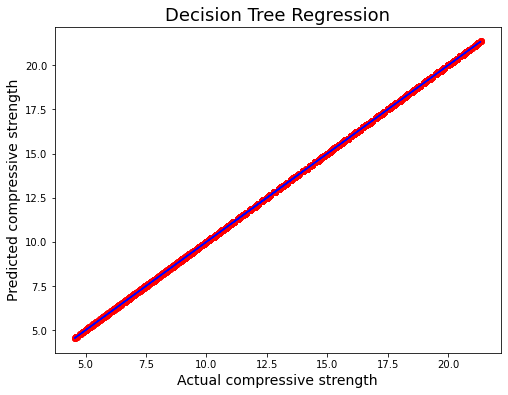

In [162]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_dt,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual compressive strength",fontsize=14)
plt.ylabel("Predicted compressive strength",fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# Hyperparameter Tuning

In [165]:
#Creating parameter list to pass the GridSearchCV
parameters = {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}

In [166]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=3,scoring='r2')      #Initializing GridSearchCV cv=cross_validation ,r2 is for improving the accuracy
GCV.fit(x_train,y_train)                                           #cv=5 means 5 cross folds will be created and there will be training and testing data . Any fold will not be empty.
GCV.best_estimator_  #finding the best estimator
GCV_pred=GCV.best_estimator_.predict(x_test) #Predicting the value using best estimator found by GridSearchCV
print("Final accuracy : ",r2_score(y_test,GCV_pred)*100) #Final accuracy

Final accuracy :  99.99999946608395


# Model Saving

In [167]:
import pickle
filename='bigdatamart.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion:

In [168]:
import numpy as np
a=np.array(y_test)
a

array([14.   ,  9.1  , 13.8  , ..., 17.6  ,  7.435, 11.15 ])

In [170]:
predicted=np.array(dt.predict(x_test))
predicted

array([14.   ,  9.1  , 13.8  , ..., 17.6  ,  7.435, 11.15 ])

In [171]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,14.000,14.000
1,9.100,9.100
2,13.800,13.800
3,17.700,17.700
4,15.350,15.350
...,...,...
2797,18.250,18.250
2798,8.945,8.945
2799,17.600,17.600
2800,7.435,7.435
